#### 1. Loading required Libraries

In [64]:
import numpy as np               # Linear Algebra
import pandas as pd              # Data Handling
import seaborn as sns            # Visualization
import matplotlib.pyplot as plt  # Visualization
from datetime import date        # Use Year
import warnings                  # For warnings
warnings.filterwarnings('ignore')

#### 2. Importing dataset into 'cars' dataframe

In [65]:
cars = pd.read_csv("../datasets/clean_car.csv")
cars=cars.iloc[:,1:]
cars.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age
0,KIA SELTOS,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,2
1,Maruti Swift,LXI,Manual,10568,1st Owner,Petrol,592499,2
2,Maruti Swift,LXI,Manual,27659,1st Owner,Petrol,533399,3
3,KIA SELTOS,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,2
4,Mercedes Benz,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,8


In [66]:
cars.iloc[:,1:]

,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age
0,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,2
1,LXI,Manual,10568,1st Owner,Petrol,592499,2
2,LXI,Manual,27659,1st Owner,Petrol,533399,3
3,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,2
4,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,8
...,...,...,...,...,...,...,...
627,LXI CNG 1.0 L,Manual,19087,1st Owner,Petrol + CNG,608899,1
628,VXI OPT,Manual,48136,1st Owner,Petrol,372999,5
629,MAGNA 1.1 IRDE2,Manual,45657,1st Owner,Petrol,350999,7
630,XZ 1.2 REVOTRON,Manual,649,1st Owner,Petrol,731399,1


#### 6. Model Fitting

##### 6.0 Outliers

Before, fitting any model we need to analyse outliers in the dataset.

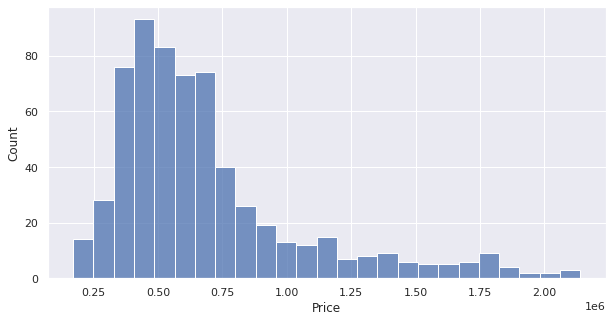

In [67]:
fig = sns.set(rc={'figure.figsize': (10, 5)})
sns.histplot(cars['Price'])
# plt.hist(cars['Price'], bins=20, rwidth=0.8)
plt.show()

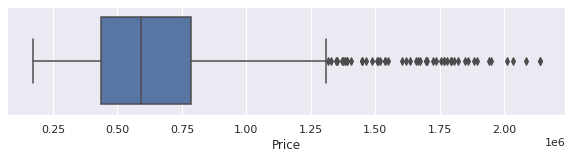

In [68]:
fig = sns.set(rc={'figure.figsize': (10, 2)})
sns.boxplot(cars['Price'])
plt.show()

**Observation**

As we can see, there are more than one outliers in the feature **Price**.

In [69]:
Q1, Q3 = np.percentile(cars['Price'], [25,75])
print(Q1, Q3)

435574.0 787049.0


In [70]:
IQR = Q3-Q1
print(IQR)

351475.0


In [71]:
lower_fence = Q1 - (1.5*IQR)
higher_fence = Q3 + (1.5*IQR)

print(lower_fence, higher_fence)

-91638.5 1314261.5


In [72]:
cars[(cars['Price'] > lower_fence) & (cars['Price'] < higher_fence)].shape

(578, 8)

#### By Z-Score

In [73]:
cars['zscore'] = (cars['Price'] - cars['Price'].mean()) / cars['Price'].std()
cars.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age,zscore
0,KIA SELTOS,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,2,3.225112
1,Maruti Swift,LXI,Manual,10568,1st Owner,Petrol,592499,2,-0.257488
2,Maruti Swift,LXI,Manual,27659,1st Owner,Petrol,533399,3,-0.415484
3,KIA SELTOS,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,2,1.856079
4,Mercedes Benz,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,8,3.594840


In [74]:
outliers = cars[(cars['zscore'] < -3) | (cars['zscore'] > 3)]
outliers.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age,zscore
0,KIA SELTOS,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,2,3.225112
4,Mercedes Benz,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,8,3.594840
30,MG HECTOR,SHARP HYBRID PETROL,Manual,12185,2nd Owner,Petrol,1848299,2,3.099731
33,Jeep Compass,1.4 LONGITUDE (O) AT,Automatic,23327,1st Owner,Petrol,2012799,3,3.539501
34,Jeep Compass,2.0 LIMITED,Manual,46860,1st Owner,Diesel,1941699,3,3.349424


In [75]:
outliers.shape

(12, 9)

In [76]:
cars = cars[(cars['zscore'] > -3) & (cars['zscore'] < 3)]
cars.shape

(620, 9)

In [77]:
del cars["zscore"]

##### 6.1. Splitting Data into X and y

In [78]:
X = cars.drop(columns =['Price'])
y = cars['Price']

##### 6.2. Importing libraries for model fitting

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

##### 6.3. Pipeline

##### 6.3.1. One Hot Encoding

In [80]:
cat_cols = ['Name','Variant','Transmission','Owner_Type','Fuel']

for col in cat_cols:
    print(col, ":", len(X[col].unique()))

Name : 76
Variant : 247
Transmission : 2
Owner_Type : 3
Fuel : 3


In [81]:
# pd.get_dummies(X, drop_first=True).shape

As number of Features increases, that leads to curse of Dimensionality.
This might impact our accuracy level.

In [82]:
ohe = OneHotEncoder()
ohe.fit(X[['Name','Variant','Transmission','Owner_Type','Fuel']])

OneHotEncoder()

In [83]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['Name','Variant','Transmission','Owner_Type','Fuel']),
    remainder='passthrough'
)

##### 6.3.2. Standard Scaler

In [84]:
scaler = StandardScaler(with_mean=False)

##### 6.3.3. Regression Models

In [85]:
# Linear Regression
lr = LinearRegression()

# Alpha values
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

# Ridge and Lasso
ridgecv = RidgeCV(alphas=alphas,cv=4)
lassocv = LassoCV(alphas=alphas,cv=4,normalize=True)

##### 6.3.4. Pipeline Structure

In [86]:
pipe = make_pipeline(column_trans, scaler, lr)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3', 'Audi Q3', 'Audi Q5', 'BMW 5', 'BMW X1', 'BMW X3',
       'Datsun Redi', 'Ford Ecosport', 'Ford Figo', 'Honda Amaze',
       'Honda Brio', 'Honda City', 'Honda Civic', 'Honda Jazz',
       'Honda WR-V', 'Hyundai Creta', 'Hyundai Elite', 'Hyundai Eon',
       '...
       'ZX CVT PETROL', 'ZXI', 'ZXI +', 'ZXI 1.2', 'ZXI AMT',
       'ZXI OPT AMT', 'ZXI+'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['1st Owner', '2nd Owner', '3rd Owner'], dtype=object),
                                                                            array(['Diesel', 'Petrol', 'Petrol + CNG'], dtype=object)]),
                                                  ['Name', 'Variant',
                                                   'Transmission', 'Owner_Type',
                                                   'Fuel'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

#### 7. Functions

##### 7.1 For converting big values into readable form

In [87]:
def format_float(num):
    return np.format_float_positional(round(num,2), trim='-')

##### 7.2. Returns Dataframe consisting all errors

In [88]:
def metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    dict_ = {
        "MAE": [format_float(mae)],
        "MSE": [format_float(mse)],
        "RMSE": [format_float(rmse)],
        "R2": [(r2)]
    }

    results = pd.DataFrame(dict_)
    results.index = ["Values"]

    return results

##### 7.3. For Training model

In [89]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


def train_model(X, y, transformer, scaler, model):
    pipe = make_pipeline(transformer, scaler, model)
    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(x_test)
    
    return metrics(y_test,y_pred), pipe

#### 8. Train

In [90]:
metrics, pipe = train_model(X, y, column_trans, scaler, lr)
metrics

,MAE,MSE,RMSE,R2
Values,83164.58,22567218267.56,150223.89,0.802508


#### 9. Dumping into pickle

In [91]:
import pickle

In [92]:
data = {"lr": pipe, "ridge": ridgecv, "lasso": lassocv}

pickle.dump(data,open('../pickle/LinearRegressionModel.pkl','wb'))

#### 10. Prediction

##### 10.1. Input from User

In [93]:
# User Input 1

Name = "Maruti Swift"
Variant = "LXI"
Transmission = "Manual"
km_driven = 10568
Owner_Type = "1st Owner"
Fuel = "Petrol"
Age = 2

In [94]:
# User Input 2

Name = "KIA SELTOS"
Variant = "HTX 1.5 PETROL MT"
Transmission = "Manual"
km_driven = 50000
Owner_Type = "1st Owner"
Fuel = "Petrol"
Age = 5

##### 10.2. User Input to Dataframe

In [95]:
dict_ = {
            "Name": [Name],
            "Variant": [Variant],
            "Transmission": [Transmission],
            "km_driven":[km_driven],
            "Owner_Type": [Owner_Type],
            "Fuel": [Fuel],
            "Age": [Age]
        }

results = pd.DataFrame(dict_)

##### 10.3. Prediction Result

In [96]:
print("The Predicted value of Car is \033[1mRs.{price:.2f}\033[0m.".format(price = pipe.predict(results)[0]))

The Predicted value of Car is Rs.1271319.55.
